# Navigation

---

In this notebook, you will learn how to use this repository to train an agent for resolving Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Training Agent

We begin by importing some necessary packages.

In [1]:
import time
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
import numpy as np

from dueling_ddqn_agent import Agent

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

from train import dqn

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.x86_64", seed=int(time.time()*1e6)%int(2**18))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Set the k number of observations used as input data plus action and state size 

In [4]:
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size        # number of actions
state_size = len(env_info.vector_observations[0])   # observation size
k = 2

Start and Train Agent network using the following configuration:
- T = 1500              # number of initial episodes
- ε_0 = 1.0
- ε_T = 0.01
- Δε = 0.995
- β_0 = 0.4
- β_T = 1.0
- num of initial samples = 5000
- target score = 3.0

Random action 5100
Episode 50	Average Score(train): -0.12	Average Score(valid): 0.06  	MSE: 1.676E-02
Episode 100	Average Score(train): -0.14	Average Score(valid): 0.16  	MSE: 1.848E-02
Episode 150	Average Score(train): 0.27	Average Score(valid): 0.35  	MSE: 1.572E-022
Episode 200	Average Score(train): 1.17	Average Score(valid): 0.72  	MSE: 1.765E-02
Episode 250	Average Score(train): 2.07	Average Score(valid): 1.03  	MSE: 1.760E-02
Episode 300	Average Score(train): 2.47	Average Score(valid): 1.31  	MSE: 1.835E-02
Episode 350	Average Score(train): 3.37	Average Score(valid): 1.49  	MSE: 1.620E-02
Episode 351	Average Score(train): 3.37	Average Score(valid): 1.53  	MSE: 1.831E-02

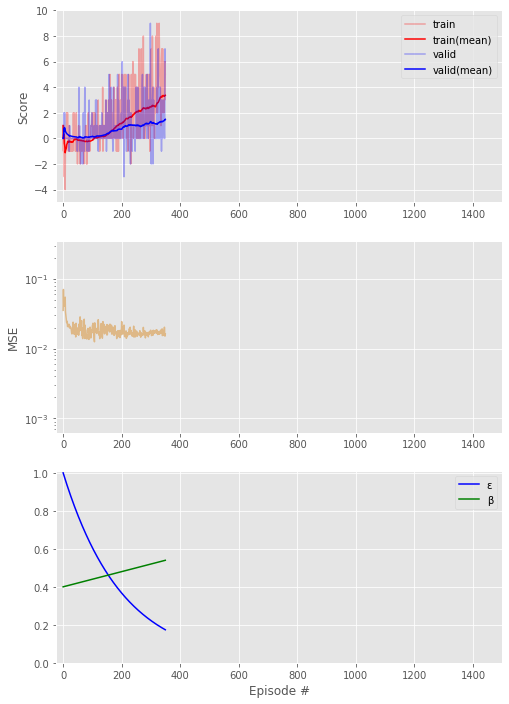

In [5]:
agent = Agent(state_size=state_size * k, action_size=action_size)

# train deep q-network
dqn(env, brain_name, agent, action_size, state_size, k=k, eps_start=1.0, eps_end=0.01,
        eps_decay=0.995, beta_start=0.4, n_episodes=int(1.5e3), n_samples=int(5e3),
        goal_score=3.0, early_stop=True)

After training the agent, a set of intermediate checkpoints were saved with the format checkpoint_X_Y.path. Where X is the number of itereation and Y is the score obtained during the validation process.
NOTE, that executing `train.py` script from terminal bring the oportunity to observe interatively agent training evolution. In addition, `train.py` script is configured according with the report. 

After training the environment must be closed.

In [6]:
env.close()

### 2. Evaluation

Before to continue, restart python kernel. Similarly, this repository contains an script `eval.py` that can be launch from the terminal for evaluate a Model agent. The model agent file must be rename as `model.pt` and should be in the script directory. As a demo evalations, here we will the following configuration:
- ε=0.001
- numb of episodes = 10

In [1]:
import time
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
import numpy as np

from dueling_ddqn_agent import Agent

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

eps=0.001
n_evaluations=10

Initiliaze environment

In [2]:
env = UnityEnvironment(file_name="Banana.x86_64", seed=int(time.time()*1e6) % int(2**18))

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size        # number of actions
state_size = len(env_info.vector_observations[0])   # observation size
k=2

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Create agent and load parameters

In [3]:
agent = Agent(state_size=state_size*k, action_size=action_size)
agent.qnetwork_local.load_state_dict(torch.load('model.pt'))

Launch evaluation

In [4]:
scores = []
mean_score = 0
for t in range(1, n_evaluations+1):
    score = 0
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state

    state_stack = deque(maxlen=k)
    for i in range(1,k):
        state_stack.append(state)

    done = False
    while not done:
        state_stack.append(state)
        s = np.array(list(state_stack)).flatten()
        action = agent.act(s, eps=eps)

        env_info = env.step(action)[brain_name]             # send the action to the environment
        reward = env_info.rewards[0]                        # get the reward
        done = env_info.local_done[0]                       # see if episode has finished
        state = env_info.vector_observations[0]             # get the next state
        score += reward                                     # update the score

        print('\rEpisode {}\tCumulative Reward: {}, \tavg(CR): {:.2f}'.format(t, int(score), mean_score), end="")

    scores.append(score)
    mean_score = np.mean(scores)
    if t%10==0:
        print('\rEpisode {}\tCumulative Reward: {}, \tavg(CR): {:.2f}'.format(t, int(score), mean_score))

Episode 10	Cumulative Reward: 18, 	avg(CR): 14.40


When finished, you can close the environment.

In [5]:
env.close()